In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt

In [2]:
RUN = "dyntrans_full_3h_ws"
PREFIX = "/mnt/c/Users/scl38887/Documents/git/aldehyde/"
INPUT = PREFIX + "results/" + RUN + "/integrated_comp/stats.csv"
OUTPUT = PREFIX + "results/" + RUN + "/graphics/pricecuts/"

In [3]:
stats = pd.read_csv(INPUT, index_col=0)

In [4]:
stats.head()

,opts,cost,mg_H2_inclu_Fisch_all,mg_H2_exclu_Fisch_all,mg_H2_False_False_exportonly,mg_H2_False_False_noexport,mg_H2_False_False_all,mg_AC_exclu_H2 El_all,mg_AC_inclu_H2 El_all,mg_AC_False_False_all,...,oil_cf,ocgt_supply,ocgt_cf,ft_capex,ft_p_nom_opt,ft_supply,ft_cf,electrolysis_p_nom_opt,electrolysis_supply,electrolysis_capex
h2export,,,,,,,,,,,,,,,,,,,,,
0,Co2L2.0,6.146478e+09,53.34,61.57,0.00,61.57,61.57,28.21,28.21,28.21,...,0.00,0.000027,0.28,0.000643,0.00001,0.000041,0.89,0.08533,0.468026,6.615830
20,Co2L2.0,7.658516e+09,89.86,92.39,92.64,91.15,92.39,22.07,22.98,22.32,...,0.00,0.000056,0.29,0.000749,0.00001,0.000047,0.89,3.47859,20.468066,269.712637
40,Co2L2.0,9.697605e+09,103.92,105.95,106.59,103.57,105.95,20.33,21.85,20.90,...,0.00,0.000020,0.26,0.000178,0.00000,0.000011,0.89,8.01316,40.467974,621.300938
60,Co2L2.0,1.185135e+10,105.47,107.59,108.44,104.65,107.59,22.03,19.51,20.83,...,0.01,0.000151,0.23,0.001362,0.00001,0.000086,0.89,15.92293,60.468185,1234.586160
80,Co2L2.0,1.403408e+10,107.60,108.35,109.82,103.79,108.35,23.97,19.54,21.54,...,0.02,0.000078,0.19,0.000321,0.00000,0.000020,0.89,23.95161,80.468002,1857.090472


In [37]:
def get_data(export):
    mg_AC_incl_H2 = stats[stats.index == export].loc[:,"mg_AC_inclu_H2 El_all"]
    mg_AC_exclu_H2 = stats[stats.index == export].loc[:,"mg_AC_exclu_H2 El_all"]
    mg_AC_False_False = stats[stats.index == export].loc[:,"mg_AC_False_False_all"]
    return mg_AC_incl_H2, mg_AC_exclu_H2, mg_AC_False_False 

In [11]:
opts = stats[stats.index == 40].opts.str[4:]
opts = np.unique(
        opts.fillna(100).astype(float)
    )  # TODO improve the fillna value
opts_reverse = 1 - opts
opts_reverse[opts_reverse < 0] = 0
opts = opts_reverse[::-1] * 100

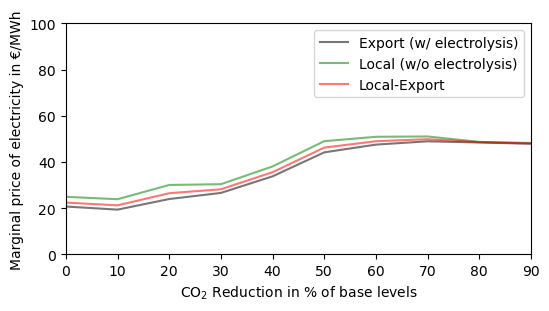

In [41]:
# Plot the lcoe_w_electrolysis lcoe_w_no_electrolysis along the stats["opts"]


fig, ax = plt.subplots(figsize=(6, 3))

for export in [100]: # [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]:
    contour_mg_AC_incl_H2, contour_mg_AC_exclu_H2, contour_mg_AC_False_False = get_data(export)
    ax.plot(opts, contour_mg_AC_incl_H2, label="Export (w/ electrolysis)", color = "black", alpha = (export/300)+0.2)
    ax.plot(opts, contour_mg_AC_exclu_H2, label="Local (w/o electrolysis)", color = "green", alpha = (export/300)+0.2)
    ax.plot(opts, contour_mg_AC_False_False, label="Local-Export", color = "red", alpha = (export/300)+0.2)
    ax.set_label("Export in % of base levels")

ax.set_xlabel("CO$_2$ Reduction in % of base levels")
ax.set_ylabel("Marginal price of electricity in €/MWh")
ax.set_xticks(opts)
ax.set_ylim(0, 100)
ax.set_xlim(0, 90)

ax.legend()

#ax.legend()
if not os.path.isdir(OUTPUT):
    os.makedirs(OUTPUT)
    print("Created directory " + OUTPUT)
plt.savefig(OUTPUT + "electricity" + str(export) + ".pdf", bbox_inches="tight")
plt.show()

Probability experiments

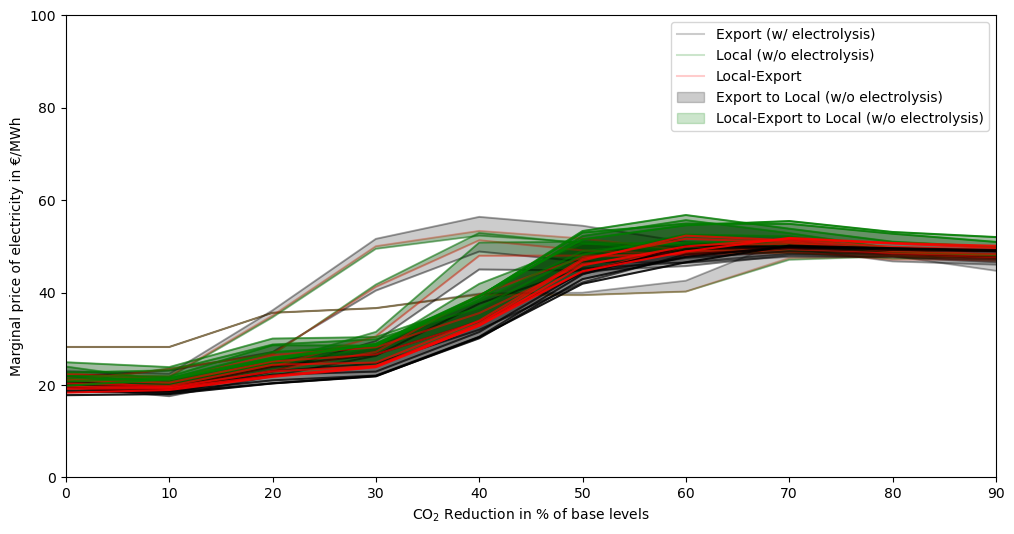

In [40]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Your existing code to get_data and other settings

fig, ax = plt.subplots(figsize=(12, 6))

exports = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]

for i, export in enumerate(exports):
    lcoe_w_electrolysis, lcoe_w_no_electrolysis, lcoe_w = get_data(export)
    
    ax.plot(opts, lcoe_w_electrolysis, color="black", alpha=(export / 300) + 0.2)
    ax.plot(opts, lcoe_w_no_electrolysis, color="green", alpha=(export / 300) + 0.2)
    ax.plot(opts, lcoe_w, color="red", alpha=(export / 300) + 0.2)

    # Fill between curves at each x point
    ax.fill_between(opts, lcoe_w_electrolysis, lcoe_w_no_electrolysis, color="black", alpha=0.2)
    ax.fill_between(opts, lcoe_w_no_electrolysis, lcoe_w, color="green", alpha=0.2)

ax.set_xlabel("CO$_2$ Reduction in % of base levels")
ax.set_ylabel("Marginal price of electricity in €/MWh")
ax.set_xticks(opts)
ax.set_ylim(0, 100)
ax.set_xlim(0, 90)

# Add legend for the filled areas
ax.legend(["Export (w/ electrolysis)", "Local (w/o electrolysis)", "Local-Export", "Export to Local (w/o electrolysis)", "Local-Export to Local (w/o electrolysis)"])

if not os.path.isdir(OUTPUT):
    os.makedirs(OUTPUT)
    print("Created directory " + OUTPUT)
plt.savefig(OUTPUT + "hydrogen.pdf", bbox_inches="tight")
plt.show()
